<a href="https://colab.research.google.com/github/SiluniKeerthiratne/DSGP/blob/nisal/v3_model_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

In [14]:
# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/ColabNotebooks/fruit-dta/trained_model.h5')

In [15]:
# Function to preprocess the input image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (244, 244))
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [16]:
# Function to predict ripeness class
def predict_ripeness(image_path):
    preprocessed_img = preprocess_image(image_path)
    predictions = loaded_model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions)
    return predicted_class_index

In [31]:
# Test the model with an example image
example_image_path = '/content/mango_ripe.jpg'  # Replace with the actual path to your test image
predicted_class_index = predict_ripeness(example_image_path)

1/1 [==============================] - 0s 169ms/step


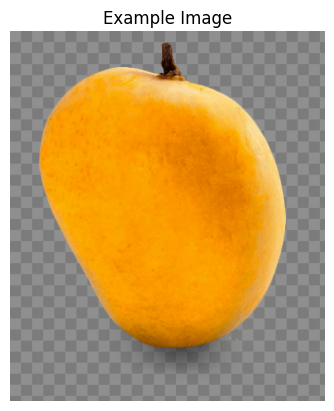

In [32]:
# Display the img
img = cv2.imread(example_image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Example Image")
plt.axis('off')
plt.show()

In [33]:
# Map the predicted class index to the ripeness class label
ripeness_classes = ['Unripe', 'Partially Ripe', 'Ripe']
predicted_ripeness_class = ripeness_classes[predicted_class_index]

In [34]:
# Display the result
print(f"The predicted ripeness class is: {predicted_ripeness_class}")

The predicted ripeness class is: Ripe
